In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

BASE_DIR = 'C:/Users/llschers/OneDrive - Indiana University/Documents/GitHub/Envisioning-Kaggle/Filtered Competition Metadata'


In [2]:
teams_df = pd.read_csv(BASE_DIR+'/Teams.csv', infer_datetime_format=True)
forums_df = pd.read_csv(BASE_DIR+'/Forums.csv', infer_datetime_format=True)
forums_topics_df = pd.read_csv(BASE_DIR+'/ForumTopics.csv', infer_datetime_format=True)
forums_messages_df = pd.read_csv(BASE_DIR+'/ForumMessages.csv', infer_datetime_format=True)
forums_message_votes_df = pd.read_csv(BASE_DIR+'/ForumMessageVotes.csv', infer_datetime_format=True)
users_df = pd.read_csv(BASE_DIR+'/Users.csv', infer_datetime_format=True)


In [3]:
#len(forums_messages_df)
forums_messages_df.head()

,Unnamed: 0,Id,ForumTopicId,PostUserId,PostDate,ReplyToForumMessageId,Message,Medal,MedalAwardDate
0,878277,1322791,241693,5960060,05/25/2021 17:19:57,NaN,"<p>Hello all! </p>\n<p>We, the host team, woul...",2.0,05/27/2021
1,878310,1316816,240665,1095143,05/20/2021 22:50:49,NaN,"<p>Hey Kagglers,</p>\n<p>We’re happy to announ...",2.0,05/21/2021
2,878311,1306482,238897,115173,05/13/2021 19:41:08,NaN,<p>We have read your feedback and investigated...,1.0,05/13/2021
3,878312,1306761,238897,349155,05/14/2021 04:20:26,1306482.0,"<p>Phil, can you please give a justification f...",3.0,05/14/2021
4,878313,1307104,238897,349155,05/14/2021 08:52:05,1306482.0,<blockquote>\n <p>This investigation determin...,NaN,05/15/2021


In [4]:
#teams
teams_df.shape # (1216,14)
teams_df.head()

,Unnamed: 0,Id,CompetitionId,TeamLeaderId,TeamName,ScoreFirstSubmittedDate,LastSubmissionDate,PublicLeaderboardSubmissionId,PrivateLeaderboardSubmissionId,IsBenchmark,Medal,MedalAwardDate,PublicLeaderboardRank,PrivateLeaderboardRank
0,3614973,5838851,22990,3516796.0,Salman,NaN,04/07/2021,20348870.0,20348870.0,False,NaN,NaN,805.0,452.0
1,3615001,5838905,22990,2116404.0,Aman Arora,NaN,12/01/2020,18211765.0,18211765.0,False,NaN,NaN,866.0,553.0
2,3615008,5838923,22990,3891191.0,Nayu.T.S.,NaN,04/24/2021,20697186.0,20697186.0,False,NaN,NaN,795.0,493.0
3,3615011,5838928,22990,385905.0,Bo Peng,NaN,05/08/2021,20967146.0,20967146.0,False,3.0,05/18/2021,326.0,81.0
4,3615056,5838987,22990,299834.0,BIZEN,NaN,05/08/2021,20843148.0,20843148.0,False,NaN,NaN,256.0,1117.0


In [5]:
#users
users_df.shape #(1624,6)
users_df.head()

,Unnamed: 0,Id,UserName,DisplayName,RegisterDate,PerformanceTier
0,2290,2825,navneeth,navneeth,09/12/2010,2
1,3857,4497,igor14497,Igor,12/03/2010,1
2,16898,18463,mathurinache,Mathurin Aché,10/11/2011,3
3,30620,34221,uncadrew,UncleDrew,03/05/2012,1
4,31983,35830,andrekos,andrekos,03/19/2012,2


547.05

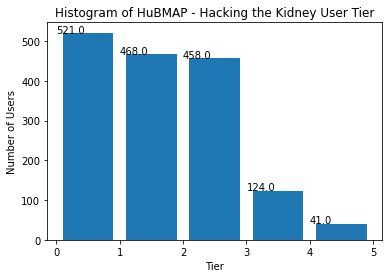

In [6]:
tier_bins=5
hist_of_tier = plt.hist(users_df['PerformanceTier'], bins=[0,1,2,3,4,5], rwidth=0.8)
plt.title("Histogram of HuBMAP - Hacking the Kidney User Tier")
plt.xlabel("Tier")
plt.ylabel("Number of Users")
for i in range(tier_bins):
    plt.text(hist_of_tier[1][i],hist_of_tier[0][i],str(hist_of_tier[0][i]))
    
bottom, top = plt.ylim()
top

In [7]:
counts, bins, bars = hist_of_tier
counts


array([521., 468., 458., 124.,  41.])

In [8]:
tiers = ['Novice', 'Contributor', 'Expert', 'Master', 'Grand Master']
tiers

['Novice', 'Contributor', 'Expert', 'Master', 'Grand Master']

In [9]:
tier_counts_df = pd.DataFrame(data={'Tier': tiers, 'NumOfUsers': counts})
tier_counts_df

,Tier,NumOfUsers
0,Novice,521.0
1,Contributor,468.0
2,Expert,458.0
3,Master,124.0
4,Grand Master,41.0


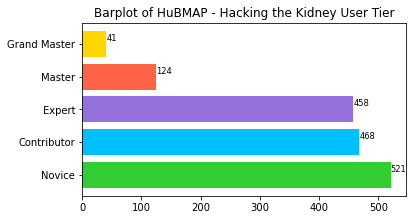

In [10]:
fig = plt.figure(figsize=(6,3))
axes= fig.add_axes((0.2, 0.1, 0.75, 0.8))
axes.barh(tier_counts_df.Tier, tier_counts_df.NumOfUsers, color=['limegreen', 'deepskyblue', 'mediumpurple', 'tomato', 'gold'])

for i, v in enumerate(tier_counts_df.NumOfUsers):
    plt.text(v + 0, i + .1, str(int(v)), color='black', fontsize='small')
    
plt.title("Barplot of HuBMAP - Hacking the Kidney User Tier")
plt.savefig('hubmap user tier barplot.png')
plt.show()

In [11]:
reversed_tier_counts_df = tier_counts_df.iloc[::-1]
reversed_tier_counts_df

,Tier,NumOfUsers
4,Grand Master,41.0
3,Master,124.0
2,Expert,458.0
1,Contributor,468.0
0,Novice,521.0


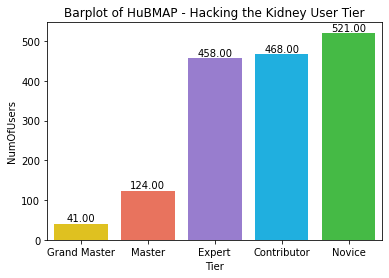

In [12]:
import seaborn as sns
custom_colors = ['gold', 'tomato','mediumpurple', 'deepskyblue', 'limegreen']
fig = plt.figure()
plots = sns.barplot(x="Tier", y="NumOfUsers", data=reversed_tier_counts_df, palette=custom_colors)
for bar in plots.patches:
   
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
plt.title("Barplot of HuBMAP - Hacking the Kidney User Tier")
plt.savefig('hubmap user tier barplot.png')
plt.show()

In [13]:
#forums
forums_df.head()


,Unnamed: 0,Id,ParentForumId,Title
0,61601,995088,8.0,HuBMAP - Hacking the Kidney


In [14]:
#forum topics
forums_topics_df.shape #(402, 14)
#forums_topics_df.head()

(395, 14)

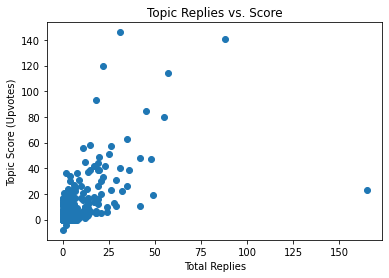

In [15]:
plt.scatter(forums_topics_df['TotalReplies'], forums_topics_df['Score'])
plt.xlabel('Total Replies')
plt.ylabel('Topic Score (Upvotes)')
plt.title('Topic Replies vs. Score')
plt.savefig('Replies vs Score.png')

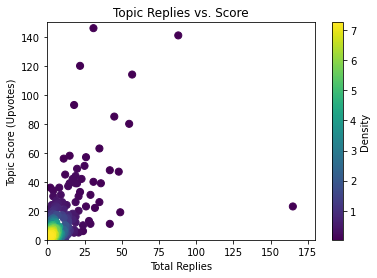

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import gaussian_kde
from matplotlib.colors import Normalize 

# identify data
x = forums_topics_df['TotalReplies']
y = forums_topics_df['Score']

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=50)
plt.xlim([0, 180])
plt.xlabel('Total Replies')
plt.ylim([0, 150])
plt.ylabel('Topic Score (Upvotes)')
plt.title('Topic Replies vs. Score')
norm = Normalize(vmin = np.min(z)*2000, vmax = np.max(z)*2000)
cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
cbar.ax.set_ylabel('Density')
plt.savefig('Replies vs Score Heat Scatter.png')
plt.show()


C:\Users\llschers\Anaconda3\lib\site-packages\mpl_scatter_density\generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
C:\Users\llschers\Anaconda3\lib\site-packages\mpl_scatter_density\generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


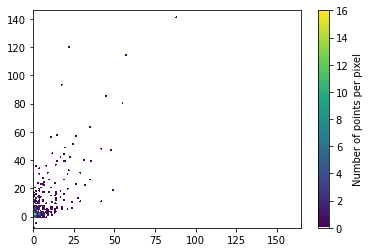

In [17]:
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap

# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x, y, cmap=white_viridis)
    fig.colorbar(density, label='Number of points per pixel')

fig = plt.figure()
using_mpl_scatter_density(fig, x, y)
plt.show()

In [18]:
outlier_topics_replies = forums_topics_df[forums_topics_df['TotalReplies']>50]
outlier_topics_replies

,Unnamed: 0,Id,ForumId,KernelId,LastForumMessageId,FirstForumMessageId,CreationDate,LastCommentDate,Title,IsSticky,TotalViews,Score,TotalMessages,TotalReplies
339,44046,198382,995088,NaN,1287877.0,1085502.0,11/20/2020 23:44:31,04/29/2021 13:42:20,Pytorch/fast.ai starter [0.905 LB],False,0,80,56,55
345,44052,207884,995088,NaN,1294792.0,1134044.0,12/31/2020 19:24:30,05/05/2021 23:37:54,HuBMAP Hacking the Kidney Competition: Revised...,False,0,114,58,57
355,44062,197524,995088,NaN,1292166.0,1081180.0,11/16/2020 22:12:38,05/03/2021 17:54:35,Looking for a Team Megathread,False,0,23,166,165
376,44226,200955,995088,NaN,1294887.0,1099658.0,12/02/2020 14:11:23,05/06/2021 03:05:16,[placeholder] starterkit ... resnet34-unet LB ...,False,0,141,89,88


In [19]:
outlier_topics_score = forums_topics_df[forums_topics_df['Score']>120]
outlier_topics_score

,Unnamed: 0,Id,ForumId,KernelId,LastForumMessageId,FirstForumMessageId,CreationDate,LastCommentDate,Title,IsSticky,TotalViews,Score,TotalMessages,TotalReplies
373,44223,200767,995088,NaN,1364060.0,1098676.0,12/01/2020 19:13:54,06/24/2021 15:27:50,🎊 🎉Winning Solutions of Image Segmentation Kag...,False,0,146,32,31
376,44226,200955,995088,NaN,1294887.0,1099658.0,12/02/2020 14:11:23,05/06/2021 03:05:16,[placeholder] starterkit ... resnet34-unet LB ...,False,0,141,89,88


In [20]:
topics_most_replies_df = forums_topics_df[forums_topics_df['TotalReplies']>35]
topics_most_replies_df.shape

(10, 14)

In [21]:
top_topics_list = topics_most_replies_df.Id.unique()

len(top_topics_list)

10

In [22]:
# filter messages by top topics

top_topic_messages_df = forums_messages_df[forums_messages_df.ForumTopicId.isin(top_topics_list)]
top_topic_messages_df.shape

(598, 9)

In [23]:
top_topic_messages_df.to_csv(BASE_DIR+'/ForumMessagesForTopTopics.csv')

In [24]:
topics_most_replies_df

,Unnamed: 0,Id,ForumId,KernelId,LastForumMessageId,FirstForumMessageId,CreationDate,LastCommentDate,Title,IsSticky,TotalViews,Score,TotalMessages,TotalReplies
64,42726,228993,995088,NaN,1280708.0,1254439.0,03/27/2021 17:14:50,04/22/2021 09:00:22,Both non-sclerotic and sclerotic glomeruli on ...,False,0,39,37,36
91,42858,235941,995088,NaN,1301580.0,1290426.0,05/02/2021 00:38:28,05/11/2021 06:37:26,Should there be a shake-up?,False,0,11,43,42
105,42872,238198,995088,NaN,1545664.0,1302287.0,05/11/2021 13:28:02,10/15/2021 12:49:44,1st place solution,False,0,85,46,45
162,43277,222666,995088,NaN,1236059.0,1220946.0,02/28/2021 14:26:39,03/12/2021 17:59:58,Breaking kaggle rule?,False,0,48,43,42
184,43299,227616,995088,NaN,1262152.0,1247107.0,03/21/2021 12:21:36,04/03/2021 21:26:53,Are we allowed to manually draw pseudo label f...,False,0,47,49,48
237,43629,225138,995088,NaN,1287665.0,1234129.0,03/11/2021 01:09:16,04/29/2021 09:44:48,What's your CV and LB?,False,0,19,50,49
339,44046,198382,995088,NaN,1287877.0,1085502.0,11/20/2020 23:44:31,04/29/2021 13:42:20,Pytorch/fast.ai starter [0.905 LB],False,0,80,56,55
345,44052,207884,995088,NaN,1294792.0,1134044.0,12/31/2020 19:24:30,05/05/2021 23:37:54,HuBMAP Hacking the Kidney Competition: Revised...,False,0,114,58,57
355,44062,197524,995088,NaN,1292166.0,1081180.0,11/16/2020 22:12:38,05/03/2021 17:54:35,Looking for a Team Megathread,False,0,23,166,165
376,44226,200955,995088,NaN,1294887.0,1099658.0,12/02/2020 14:11:23,05/06/2021 03:05:16,[placeholder] starterkit ... resnet34-unet LB ...,False,0,141,89,88


In [25]:
#forum messages
forums_messages_df.shape #(3053,9)
forums_messages_df.head()


,Unnamed: 0,Id,ForumTopicId,PostUserId,PostDate,ReplyToForumMessageId,Message,Medal,MedalAwardDate
0,878277,1322791,241693,5960060,05/25/2021 17:19:57,NaN,"<p>Hello all! </p>\n<p>We, the host team, woul...",2.0,05/27/2021
1,878310,1316816,240665,1095143,05/20/2021 22:50:49,NaN,"<p>Hey Kagglers,</p>\n<p>We’re happy to announ...",2.0,05/21/2021
2,878311,1306482,238897,115173,05/13/2021 19:41:08,NaN,<p>We have read your feedback and investigated...,1.0,05/13/2021
3,878312,1306761,238897,349155,05/14/2021 04:20:26,1306482.0,"<p>Phil, can you please give a justification f...",3.0,05/14/2021
4,878313,1307104,238897,349155,05/14/2021 08:52:05,1306482.0,<blockquote>\n <p>This investigation determin...,NaN,05/15/2021


In [26]:
#forum message votes
forums_message_votes_df.shape #(6883,6)
forums_message_votes_df.head()


,Unnamed: 0,Id,ForumMessageId,FromUserId,ToUserId,VoteDate
0,1239709,1626312,1081179,4178592,1095143,11/16/2020
1,1239710,1626447,1081179,5314639,1095143,11/17/2020
2,1239711,1626456,1081179,4878384,1095143,11/17/2020
3,1239712,1626600,1081179,1304450,1095143,11/17/2020
4,1239713,1626612,1081179,6172537,1095143,11/17/2020
